In [14]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import cripser
import persim
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt2d, wiener
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_nl_means,
    denoise_wavelet,
    estimate_sigma,
    denoise_tv_bregman,
)

def compute_diagram(img):
    ph = cripser.computePH(img)
    return [ph[ph[:, 0] == d, 1:3] for d in range(2)]

def denoise_image(image, method, **kwargs):
    """
    Apply a specified denoising method to an image.

    Parameters:
    -----------
    image : ndarray
        Input image (2D array).
    method : str
        Denoising method name. One of:
        - 'gaussian'
        - 'median'
        - 'wiener'
        - 'tv_chambolle'
        - 'tv_bregman'
        - 'nl_means'
        - 'wavelet'
    kwargs : additional keyword arguments for the corresponding denoising function

    Returns:
    --------
    denoised : ndarray
        Denoised image.
    """
    method = method.lower()

    if method == 'gaussian':
        sigma = kwargs.get('sigma', 1)
        return gaussian_filter(image, sigma=sigma)

    elif method == 'median':
        kernel_size = kwargs.get('kernel_size', 3)
        return medfilt2d(image, kernel_size=kernel_size)

    elif method == 'wiener':
        mysize = kwargs.get('mysize', None)
        noise = kwargs.get('noise', None)
        return wiener(image, mysize=mysize, noise=noise)

    elif method == 'tv_chambolle':
        weight = kwargs.get('weight', 0.1)
        return denoise_tv_chambolle(image, weight=weight)

    elif method == 'tv_bregman':
        weight = kwargs.get('weight', 5)
        return denoise_tv_bregman(image, weight=weight)

    elif method == 'nl_means':
        sigma_est = kwargs.get('sigma', estimate_sigma(image, channel_axis=None))
        patch_kw = dict(
            patch_size=5,
            patch_distance=6,
            h=0.8 * sigma_est,
            channel_axis=None
        )
        patch_kw.update(kwargs)
        return denoise_nl_means(image, **patch_kw)

    elif method == 'wavelet':
        return denoise_wavelet(image, channel_axis=None, **kwargs)

    else:
        raise ValueError(f"Unknown denoising method: {method}")


In [2]:
import urllib
import os
import numpy as np

# download image
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/pagoda.npy"
fn = "pagoda.npy"
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

img = np.load(fn)

(-0.5, 799.5, 533.5, -0.5)

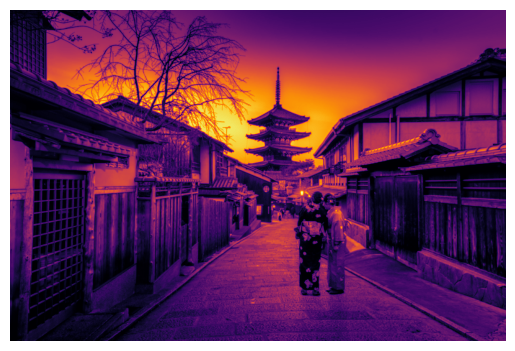

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='inferno')
plt.axis('off')

In [46]:
results = {
    "original":{
        "image": img,
        "diagram": compute_diagram(img)
    }
}

sigmas = [0.1, 0.2, 0.3, 0.5, 1, 1.5, 2, 3]
method = 'wavelet'

for sigma in sigmas:
    denoised_img = denoise_image(img, method, wavelet='db1', mode='soft', rescale_sigma=True, sigma=sigma)
    results[f"{method}_{sigma}"] = {
        "image": denoised_img,
        "diagram": compute_diagram(denoised_img)
    }

-----------------------
-----------------------
Plotting Original



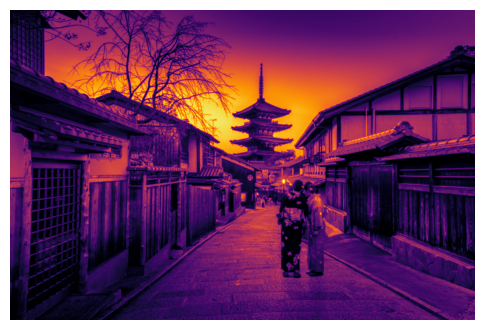

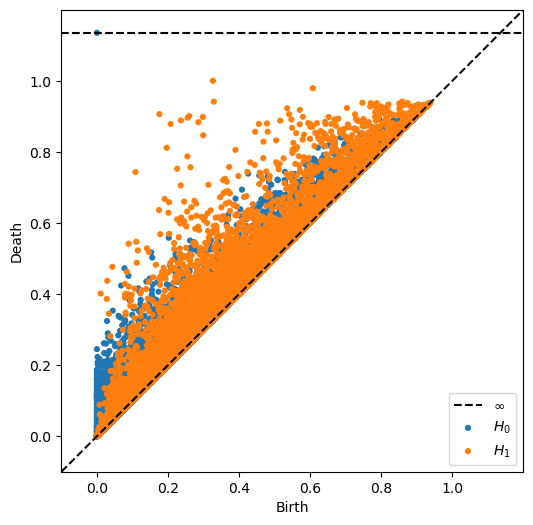

-----------------------
-----------------------
Plotting Wavelet_0.1



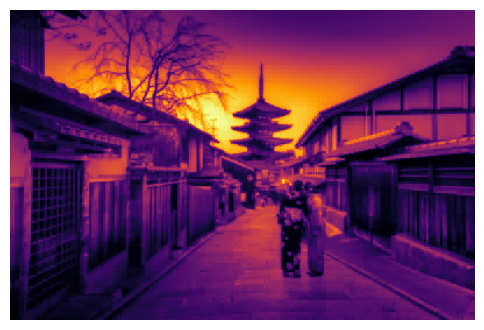

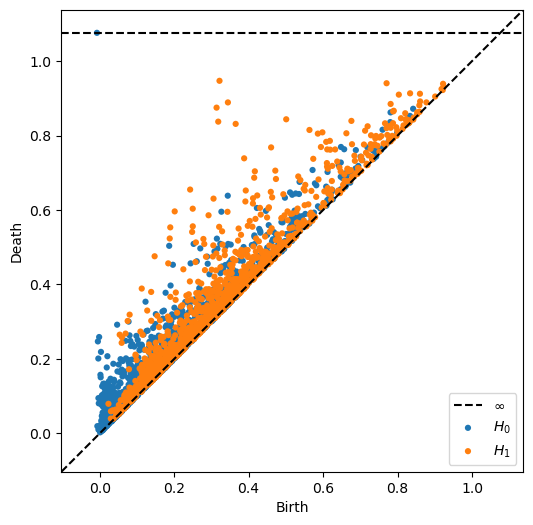

-----------------------
-----------------------
Plotting Wavelet_0.2



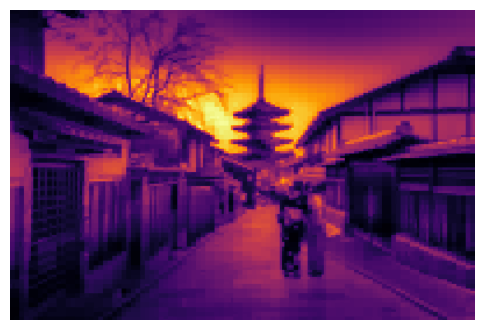

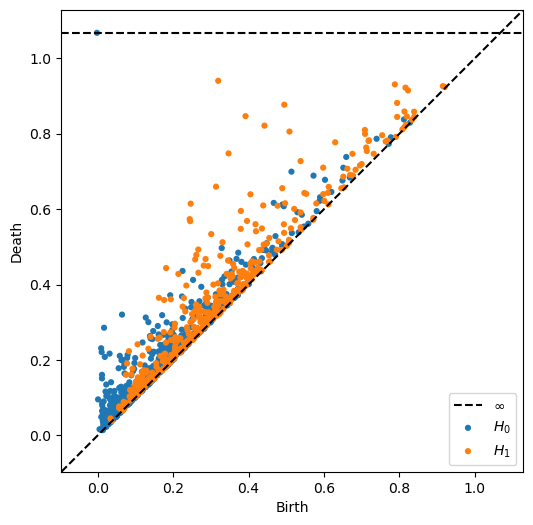

-----------------------
-----------------------
Plotting Wavelet_0.3



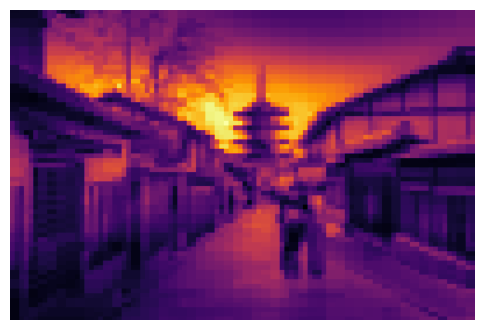

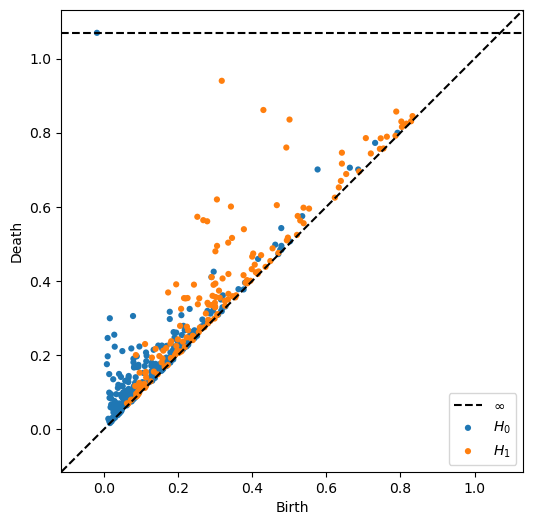

-----------------------
-----------------------
Plotting Wavelet_0.5



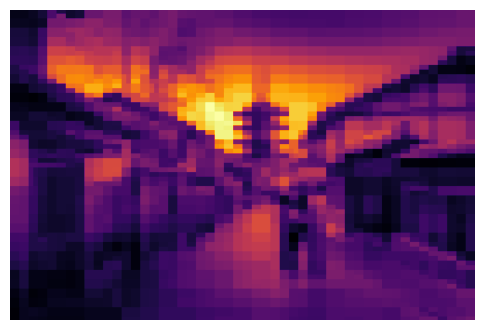

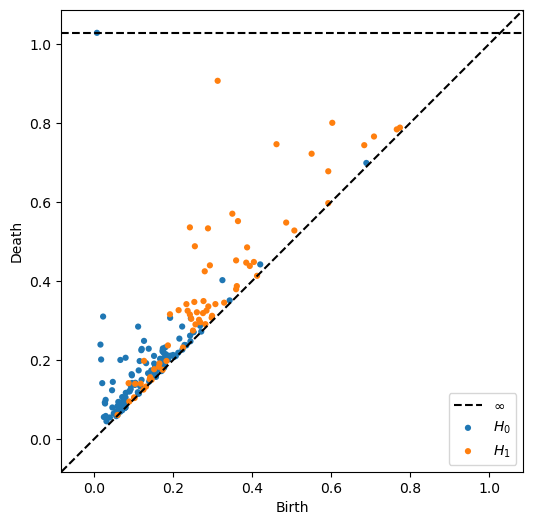

-----------------------
-----------------------
Plotting Wavelet_1



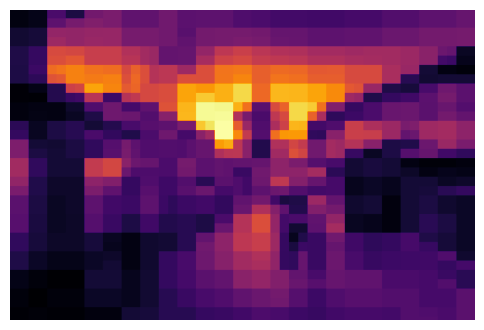

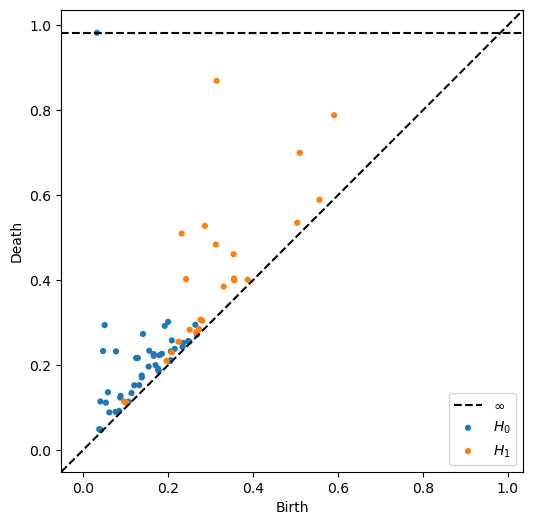

-----------------------
-----------------------
Plotting Wavelet_1.5



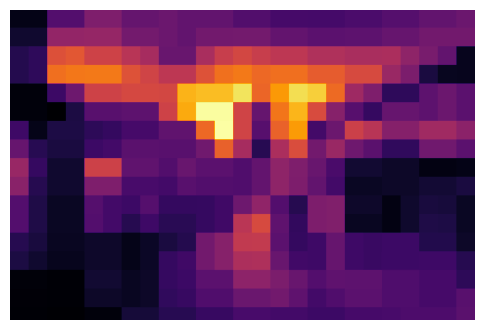

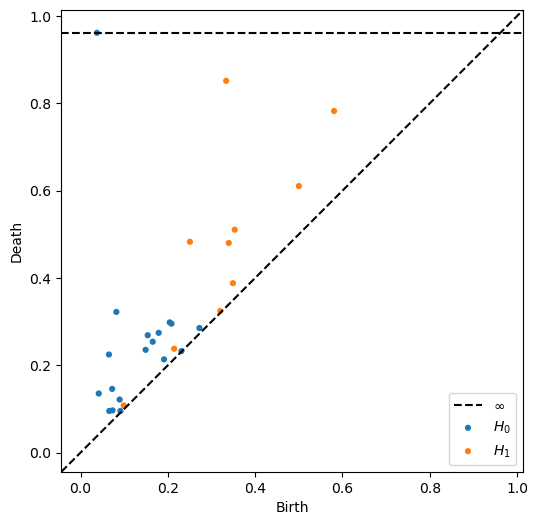

-----------------------
-----------------------
Plotting Wavelet_2



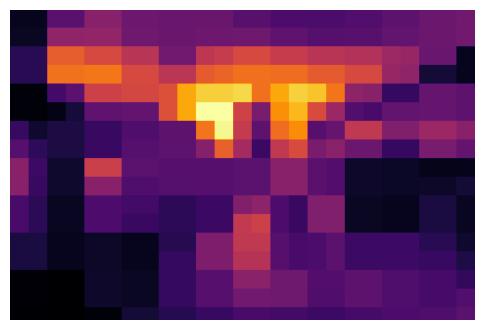

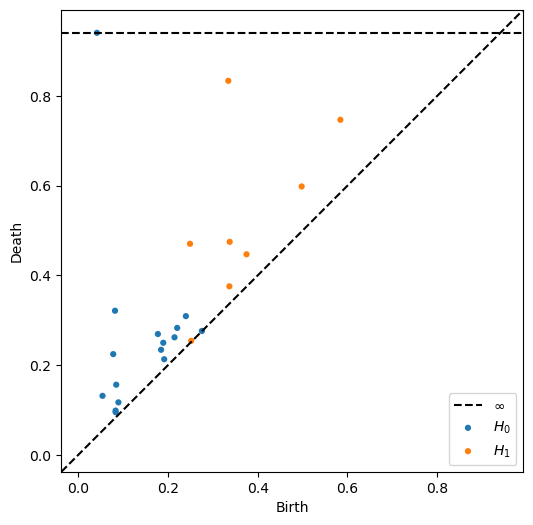

-----------------------
-----------------------
Plotting Wavelet_3



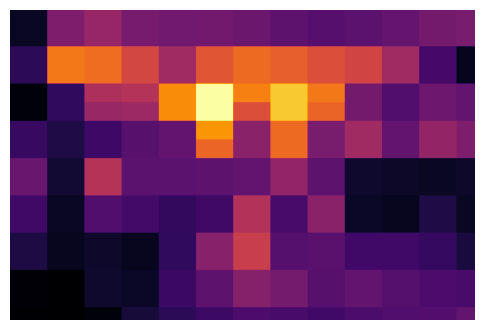

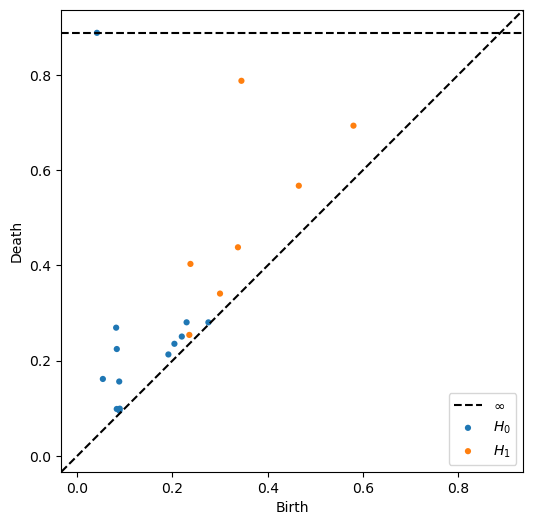

In [47]:
SAVE_PLOTS = False

import os
if not os.path.exists("pagoda_denoised"):
    os.makedirs("pagoda_denoised")

for key, result in results.items():
    print("-----------------------")
    print("-----------------------")
    print(f"Plotting {key.title()}\n")
    plt.figure(figsize=(6, 6))
    plt.imshow(result["image"], cmap='inferno')
    # plt.title(key)
    plt.axis('off')
    if SAVE_PLOTS:
        plt.savefig(f"pagoda_denoised/{key}_img.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Plot persistence diagrams
    fig, ax = plt.subplots(figsize=(6, 6))
    persim.plot_diagrams(result["diagram"], show=(not SAVE_PLOTS), ax=ax)
    if SAVE_PLOTS:
        plt.savefig(f"pagoda_denoised/{key}_diagram.png", dpi=300)

In [50]:
results = {
    "original":{
        "image": img,
        "diagram": compute_diagram(img)
    }
}

sigmas = [0.1, 0.5, 1, 2, 3, 5, 10, 30, 50, 100]
method = 'gaussian'

for sigma in sigmas:
    denoised_img = denoise_image(img, method, wavelet='db1', mode='soft', rescale_sigma=True, sigma=sigma)
    results[f"{method}_{sigma}"] = {
        "image": denoised_img,
        "diagram": compute_diagram(denoised_img)
    }

-----------------------
-----------------------
Plotting Original



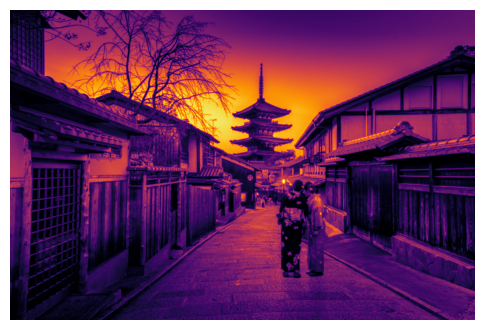

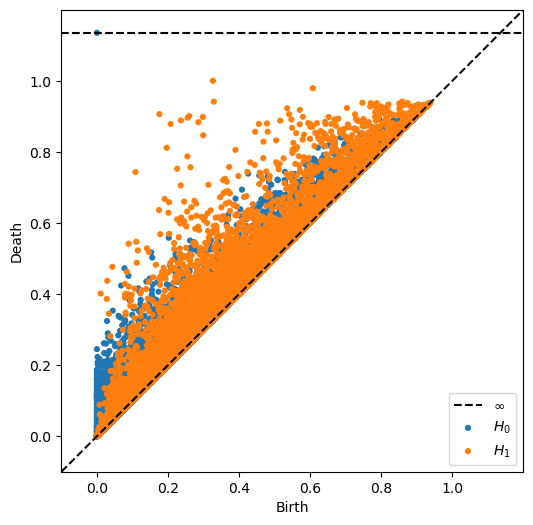

-----------------------
-----------------------
Plotting Gaussian_0.1



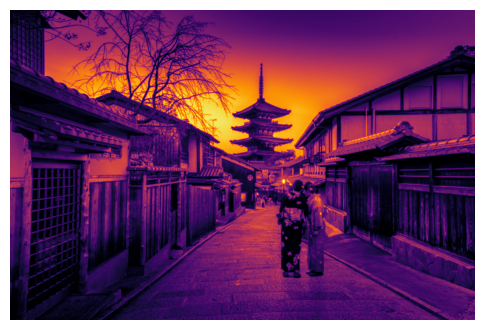

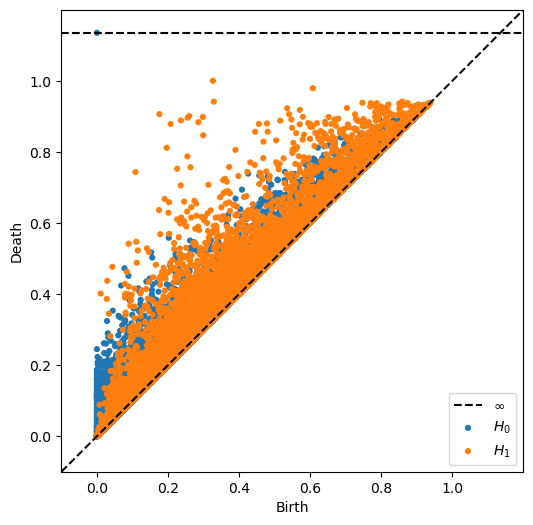

-----------------------
-----------------------
Plotting Gaussian_0.5



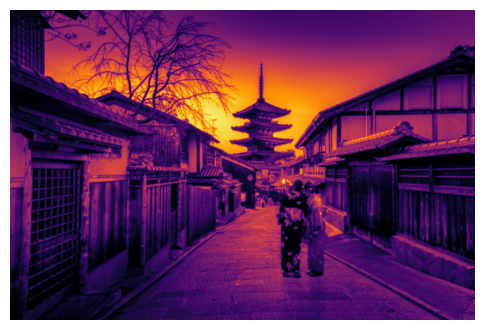

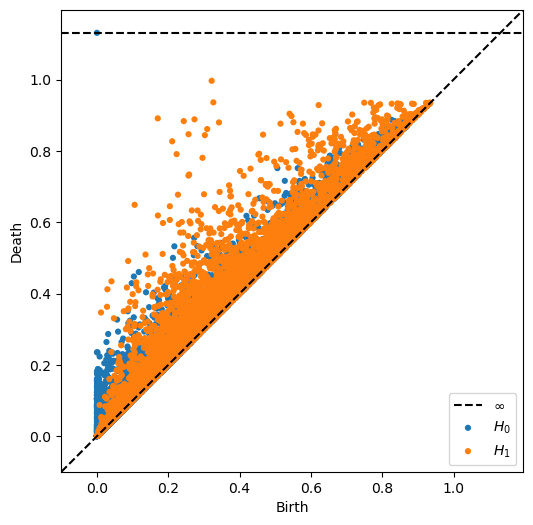

-----------------------
-----------------------
Plotting Gaussian_1



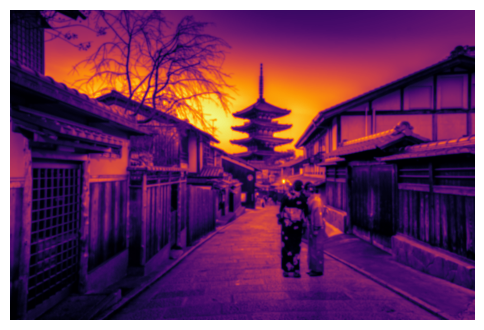

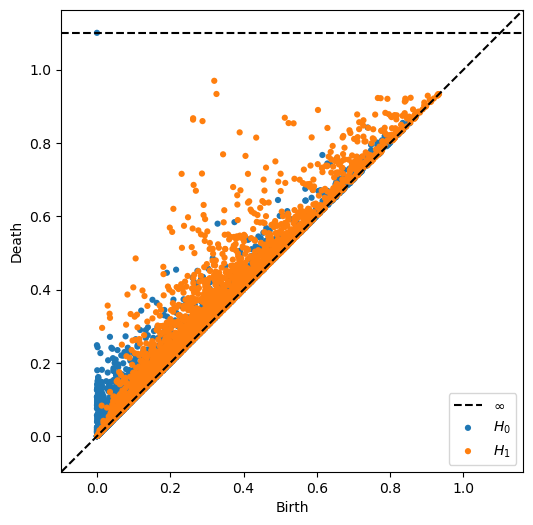

-----------------------
-----------------------
Plotting Gaussian_2



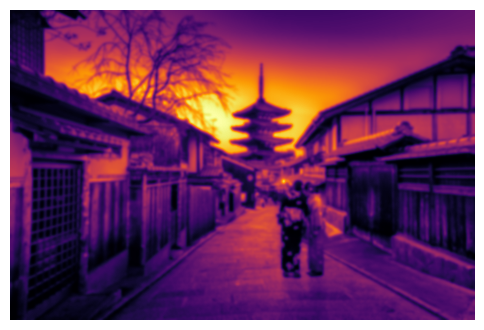

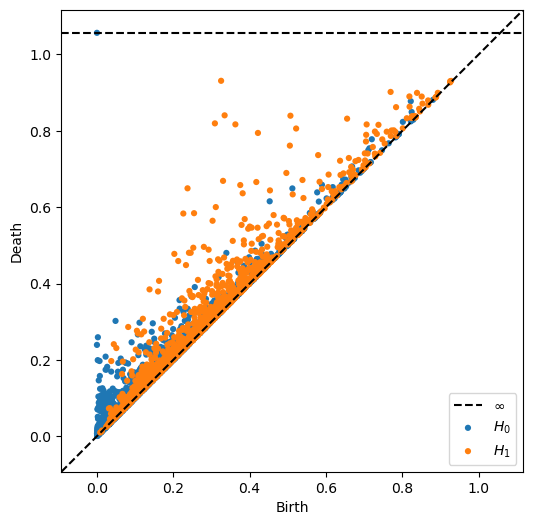

-----------------------
-----------------------
Plotting Gaussian_3



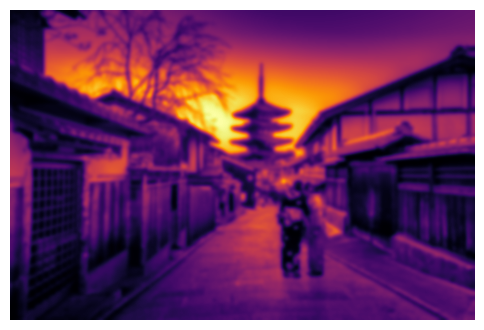

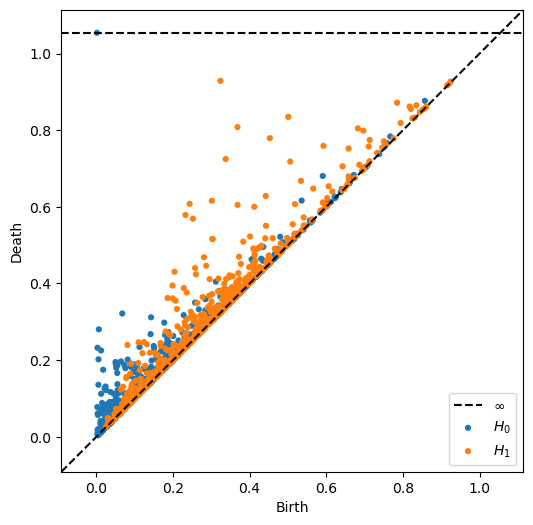

-----------------------
-----------------------
Plotting Gaussian_5



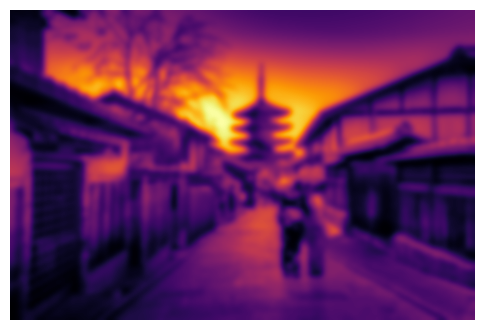

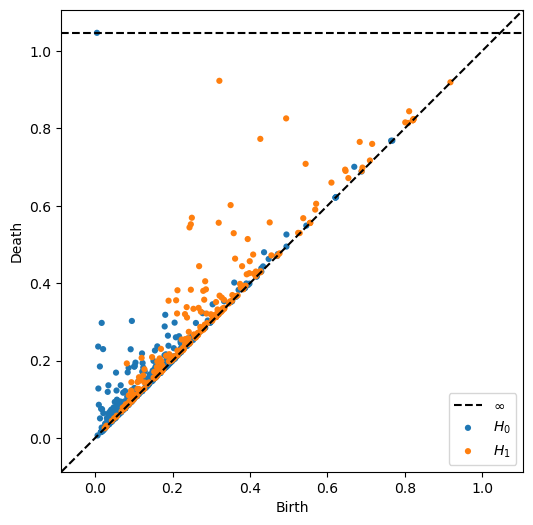

-----------------------
-----------------------
Plotting Gaussian_10



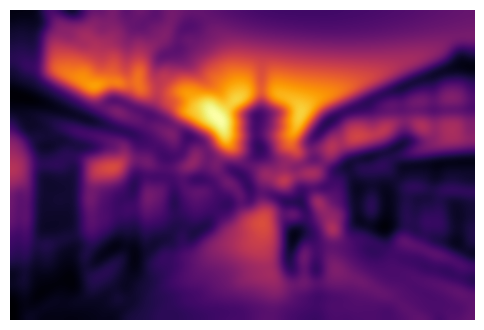

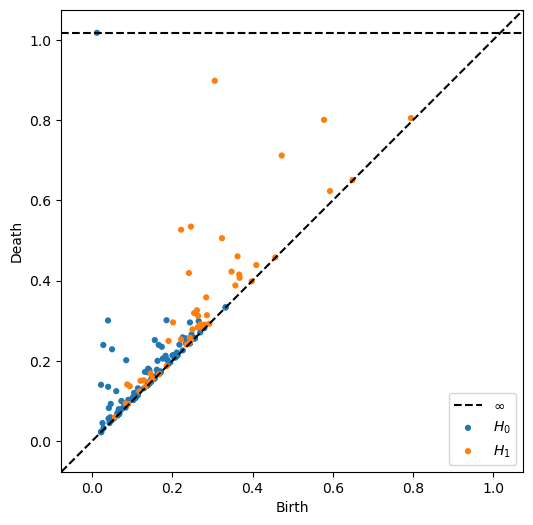

-----------------------
-----------------------
Plotting Gaussian_30



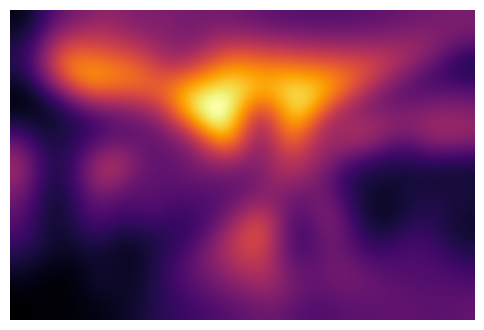

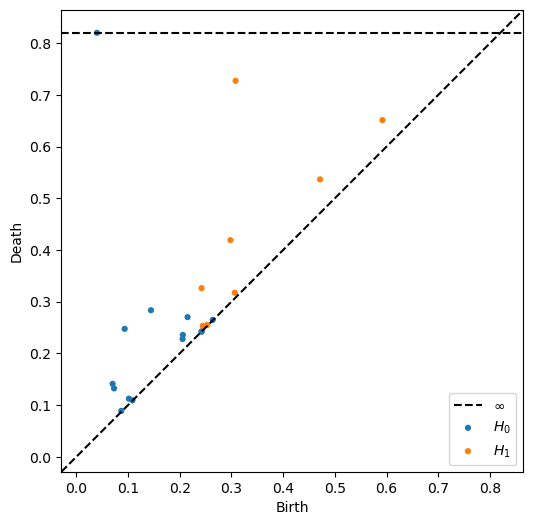

-----------------------
-----------------------
Plotting Gaussian_50



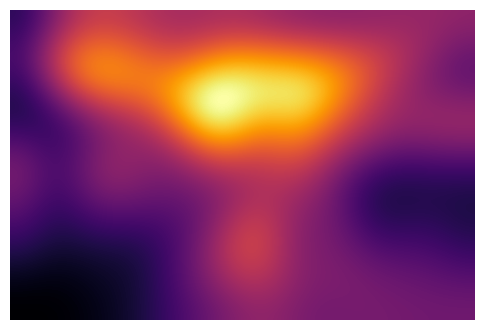

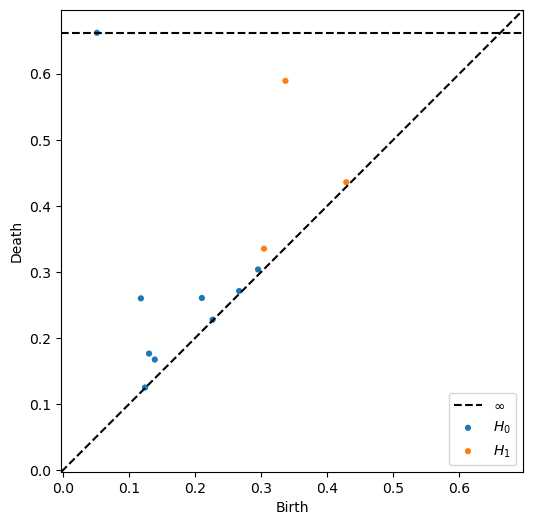

-----------------------
-----------------------
Plotting Gaussian_100



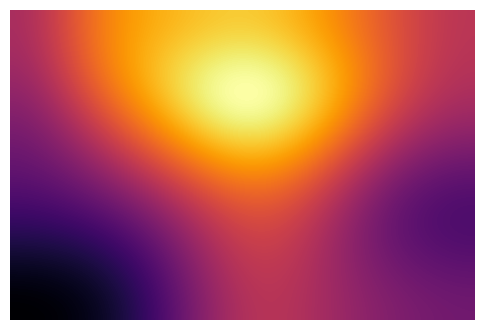

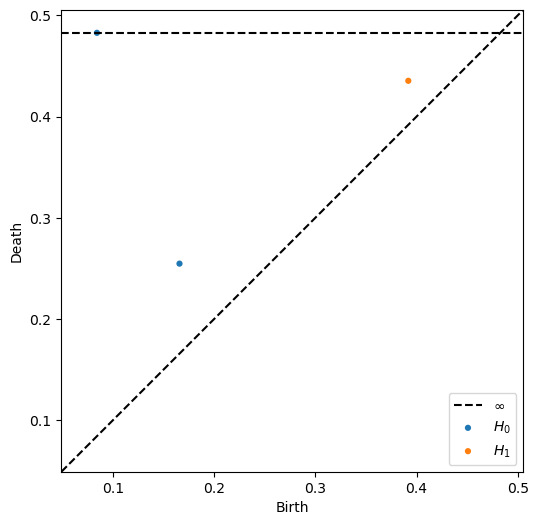

In [51]:
SAVE_PLOTS = False

import os
if not os.path.exists("pagoda_denoised"):
    os.makedirs("pagoda_denoised")

for key, result in results.items():
    print("-----------------------")
    print("-----------------------")
    print(f"Plotting {key.title()}\n")
    plt.figure(figsize=(6, 6))
    plt.imshow(result["image"], cmap='inferno')
    # plt.title(key)
    plt.axis('off')
    if SAVE_PLOTS:
        plt.savefig(f"pagoda_denoised/{key}_img.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Plot persistence diagrams
    fig, ax = plt.subplots(figsize=(6, 6))
    persim.plot_diagrams(result["diagram"], show=(not SAVE_PLOTS), ax=ax)
    if SAVE_PLOTS:
        plt.savefig(f"pagoda_denoised/{key}_diagram.png", dpi=300)